# Talks per Year

We need to know how the 1747 TED talks are distributed across the years in order to make decisions about what years to include in any study of trends. As the graphs below, eventually, reveal, only starting in 2002 are there a significant number of TED talks, with that number doubling in 2009. Such numbers will affect how we think about lexicon and topics, especially as those thing themselves are distributed across disciplines, genders, etc.

## Summary

WHAT: After loading the data, we break out the years and the kind of event from the list of events as given on the TED web page for a talk, looking to see how many talks were given in a year and how many talks from the various events make up the overall corpus.

HOW: We operate on lists derived from columns in the dataset, eventually merging them into a custom dataframe so that we can sum values and visualize the results. Because nothing with TED is easy, we come across some missing values in the process that then get filled in.

In the end, we add a new feature to our current dataset, `event`, that will allow us to date a talk to the year it was presented, separate from the year it was `published` on the TED website. This opens up the possibility of exploring changes in the offset between the two: which talks are published more quickly to the site?

## Imports and Data

In [1]:
# Imports
import pandas as pd, re

# Load the Data
df = pd.read_csv('../output/TEDall_speakers.csv')

# Lists from the dataframe is probably not the best way to do this: 
urls = df.public_url.tolist()
events = df.event.tolist()

# We should probably replace the URLs with these labels
labels = [item.replace('https://www.ted.com/talks/','') for item in urls ]

# .shape is just to check to make sure everything loaded correctly
# `list()` is to remind us of column names
print(df.shape, list(df))

(1747, 27) ['Set', 'Talk_ID', 'public_url', 'headline', 'description', 'event', 'duration', 'published', 'tags', 'views', 'text', 'speaker_1', 'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile', 'speaker_2', 'speaker2_occupation', 'speaker2_introduction', 'speaker2_profile', 'speaker_3', 'speaker3_occupation', 'speaker3_introduction', 'speaker3_profile', 'speaker_4', 'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile']


## Total Talks by Year

The best way to get the year a talk was presented is to get the year out of the TED event. The regex below grabs the numbers out of the strings in the `events` list. (Since we only expect one result below, `re.search(r'\d+', item)` \[with or without `.group` appended\], might be preferred, but I could not get it to return a string: it simply returned some version of a regex iterator.)

The series of regex expressions below capture first the year and then everything not the year and stores them as lists, `years` and `event_kinds`. It then combines the two new lists with the original list from which they were derived in a dataframe so we can check results by hand/eye -- but first we do some quick and easy plotting, which turns up some unexpected results.

In [2]:
# regex to capture only the year in the event, e.g. "2006" from "TED2006"
years = [ re.findall(r'\d+', item) for item in events ]

# re.findall returns a list, so here we're simply flattening to a string
years = [ ''.join(item) for item in years]

# regex to capture everything not a digit/year 
event_kinds = [ re.sub('\d+', '', item) for item in events ]

# Assemble a dataframe from which to work
Events = pd.DataFrame(list(zip(years, event_kinds, events)), 
                      columns = ['Year', 'Event', 'Original'], index=labels )
Events.head()

,Year,Event,Original
al_gore_on_averting_climate_crisis,2006,TED,TED2006
david_pogue_says_simplicity_sells,2006,TED,TED2006
majora_carter_s_tale_of_urban_renewal,2006,TED,TED2006
ken_robinson_says_schools_kill_creativity,2006,TED,TED2006
hans_rosling_shows_the_best_stats_you_ve_ever_seen,2006,TED,TED2006


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

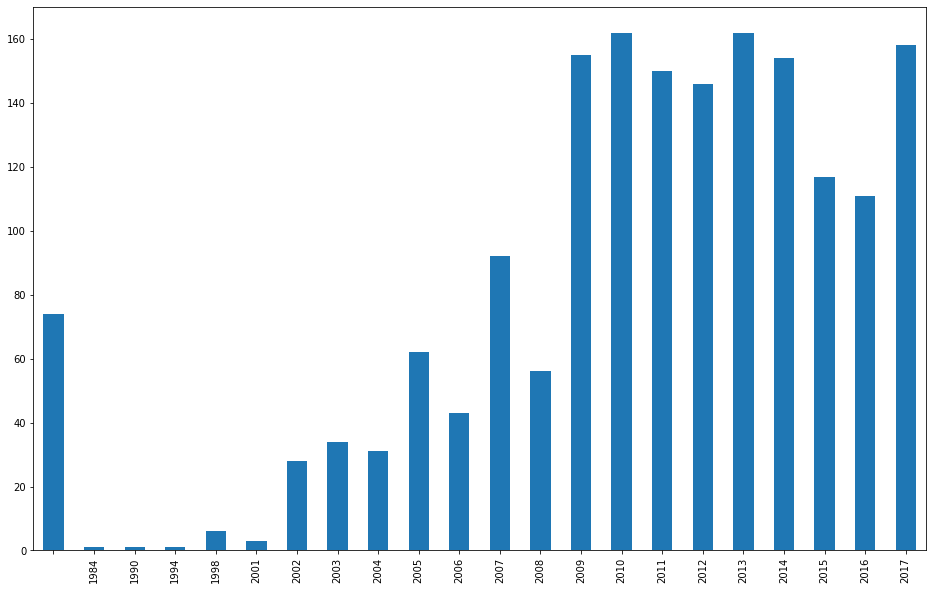

In [4]:
Events['Year'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize = (16,10))

## The Missing Years

Always, always, always there is some weirdness. What is going on with the leftmost bar in the graph above? We've got a little over 70 of *something*. It has no year attached to it and the `isnull` method reported zero. I suspect it's because we have empty strings, which are not null.

So, our next step is to filter the dataframe to show only the rows which have empty strings for the year:

In [5]:
Events[Events['Year'] == '']

,Year,Event,Original
johann_hari_everything_you_think_you_know_about_addiction_is_wrong,,TEDGlobalLondon,TEDGlobalLondon
jon_ronson_what_happens_when_online_shaming_spirals_out_of_control,,TEDGlobalLondon,TEDGlobalLondon
yuval_noah_harari_what_explains_the_rise_of_humans,,TEDGlobalLondon,TEDGlobalLondon
tony_wyss_coray_how_young_blood_might_help_reverse_aging_yes_really,,TEDGlobalLondon,TEDGlobalLondon
jim_al_khalili_how_quantum_biology_might_explain_life_s_biggest_questions,,TEDGlobalLondon,TEDGlobalLondon
...,...,...,...
zeynep_tufekci_we_re_building_a_dystopia_just_to_make_people_click_on_ads,,TEDGlobal>NYC,TEDGlobal>NYC
robert_muggah_the_biggest_risks_facing_cities_and_some_solutions,,TEDGlobal>NYC,TEDGlobal>NYC
per_espen_stoknes_how_to_transform_apocalypse_fatigue_into_action_on_global_warming,,TEDGlobal>NYC,TEDGlobal>NYC
naoko_ishii_an_economic_case_for_saving_the_planet,,TEDGlobal>NYC,TEDGlobal>NYC


We write the dataframe above to a CSV file in order to examine it:

In [ ]:
# Events[Events['Year'] == ''].to_csv('../output/noyear.csv')

A hand inspection of the events reveals there are 5 events without dates in their event name. The cell below confirms the events and also counts them: 

In [6]:
Events[Events['Year'] == ''].groupby('Event').count()

,Year,Original
Event,,
TEDGlobal>Geneva,11,11
TEDGlobal>London,13,13
TEDGlobal>NYC,8,8
TEDGlobalLondon,8,8
TEDSummit,34,34


The code below masks the dataframe in place such that if the event is one of the above, it replaces the value in the `Year` column with the value at the end of the expression, which is here a number in a string. For the sake of clarity, I have repeated it for each find and replace that needed to get done.

In [7]:
Events.loc[Events['Event'] == 'TEDGlobal>Geneva', 'Year'] = '2015'

In [8]:
Events.loc[Events['Event'] == 'TEDGlobal>London', 'Year'] = '2015'

In [9]:
Events.loc[Events['Event'] == 'TEDGlobal>NYC', 'Year'] = '2017'

In [10]:
Events.loc[Events['Event'] == 'TEDGlobalLondon', 'Year'] = '2015'

Having made those replacements, we are left with only TEDSummit, which occurred twice, April 2010 and June 2016. All the 2012 events were published by 2013, so we can pull in that column, append it to our dataframe, find that value in `published` and use it to replace the values in `Event`.

First, here is the cell demonstrating what work remains need to be done:

In [11]:
Events[Events['Year'] == ''].groupby('Event').count()

,Year,Original
Event,,
TEDSummit,34,34


Our first step is to grab the publication dates for the talks and then to add them to our current dataframe:

In [ ]:
# Fetch the publication dates from our original dataframe at the top of this notebook:
published = df.published.tolist()

# Add those events to our working dataframe and then view the first 5 rows:
Events['Posted'] = published
Events.head()

Now, let's check the dates to see how we are going to fill things in:

In [12]:
Events[Events['Year'] == ''].groupby('Event').head(40)

,Year,Event,Original
marwa_al_sabouni_how_syria_s_architecture_laid_the_foundation_for_brutal_war,,TEDSummit,TEDSummit
alexander_betts_why_brexit_happened_and_what_to_do_next,,TEDSummit,TEDSummit
emma_marris_nature_is_everywhere_we_just_need_to_learn_to_see_it,,TEDSummit,TEDSummit
el_seed_a_project_of_peace_painted_across_50_buildings,,TEDSummit,TEDSummit
gerard_ryle_how_the_panama_papers_journalists_broke_the_biggest_leak_in_history,,TEDSummit,TEDSummit
ed_boyden_baby_diapers_inspired_this_new_way_to_study_the_brain,,TEDSummit,TEDSummit
suzanne_simard_how_trees_talk_to_each_other,,TEDSummit,TEDSummit
ngozi_okonjo_iweala_how_africa_can_keep_rising,,TEDSummit,TEDSummit
monica_araya_a_small_country_with_big_ideas_to_get_rid_of_fossil_fuels,,TEDSummit,TEDSummit
sarah_parcak_hunting_for_peru_s_lost_civilizations_with_satellites,,TEDSummit,TEDSummit


As luck would have it, all the TEDSummits missing a year are actually those from the 2016 event. Filling in the year needs to be done with an IF statement in pandas. (An earlier version of this notebook used `Events[Events['Year'] == ''] = '2016'` which essentially sprayed `2016` everywhere.)

In [13]:
Events.loc[Events['Event'] == 'TEDSummit', 'Year'] = '2016' 

Having filled the last of the missing information in, we make sure:

In [14]:
Events[Events['Year'] == ''].groupby('Event').count()

,Year,Original
Event,,


And having done that, we can finally re-run our command to create a graph to see the talks by year they were initially given:

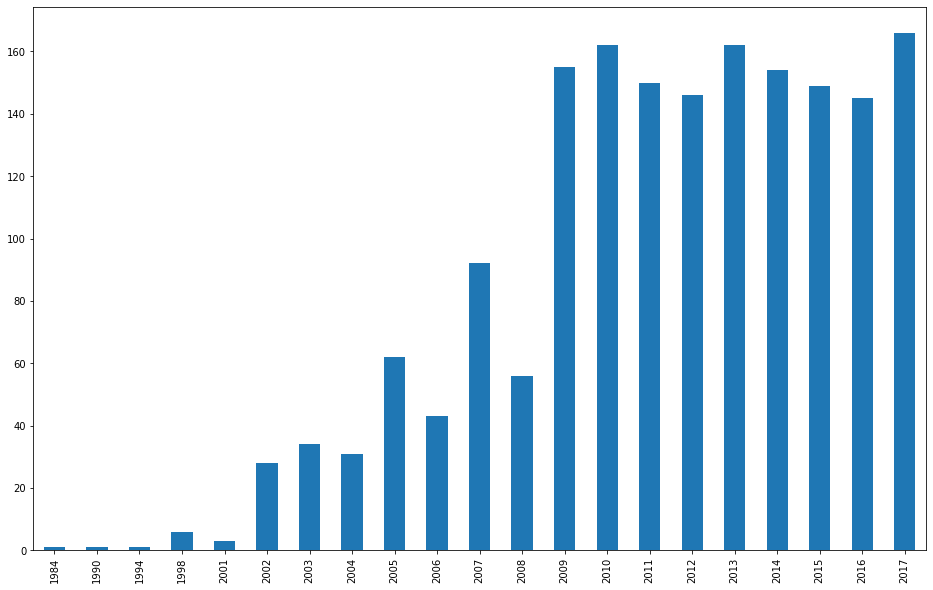

In [15]:
Events['Year'].value_counts().sort_index(ascending=True).plot(kind='bar', figsize = (16,10))

### Save the Date(s)

Having established the dates of the events, we now add this informatin back to our main dataset, `TEDall_speakers.csv`, which we will write as a new CSV file once we are done.

In [16]:
df['presented'] = Events['Year']

In [17]:
print(df.shape, list(df))

(1747, 28) ['Set', 'Talk_ID', 'public_url', 'headline', 'description', 'event', 'duration', 'published', 'tags', 'views', 'text', 'speaker_1', 'speaker1_occupation', 'speaker1_introduction', 'speaker1_profile', 'speaker_2', 'speaker2_occupation', 'speaker2_introduction', 'speaker2_profile', 'speaker_3', 'speaker3_occupation', 'speaker3_introduction', 'speaker3_profile', 'speaker_4', 'speaker4_occupation', 'speaker4_introduction', 'speaker4_profile', 'presented']


### Save the Event(s)

Before we close out this notebook, there is one last thing we need to add to the dataset, and that is the *kind* of TED event, so that we can get a summative table like the one below. Currently, `event` in the main dataset holds what the `Events` dataframe called the original event and then we derived the kind of event by peeling off the year of the original event.

In [18]:
Events['Event'].value_counts().sort_index(ascending=True)

TED                                 992
TED Senior Fellows at TEDGlobal       1
TEDActive                             6
TEDGlobal                           460
TEDGlobal>Geneva                     11
TEDGlobal>London                     13
TEDGlobal>NYC                         8
TEDGlobalLondon                       8
TEDMED                               72
TEDSummit                            34
TEDWomen                            123
TEDYouth                             19
Name: Event, dtype: int64

### Save!

Saving these two new columns to the original dataset is not as straightforward as the code above suggests: if the indices are not exactly equal, pandas will simply save a whole lot of `NaN` and not tell you anything was wrong. (Only a later inspection of the `presented` and `TEDevent` column (which we are about to create) revealed this problem.

As working proof, here's the shape of the `Events` dataframe, which is a match, in terms of rows, with the original dataframe, but then the next cell reveals that the indices are not the same, and thus copying one column from the other will produce `NaN`s.

In [20]:
Events.shape

(1747, 3)

In [21]:
df.index.equals(Events.index)

False

Two solutions: equalize the indices or simply get the values out of the `Events` dataframe. We chose the latter, but it should be noted that this can be done in one line of code, rather than two, thusly:

```python
df = df.assign(**{c: Events[c].to_numpy() for c in ('Event', 'Year')})
```

We think the two lines are actually more readable:

In [22]:
df['TEDevent'] = Events['Event'].values

In [23]:
df['presented'] = Events['Year'].values

In [24]:
# df.to_csv('../output/TEDall.csv')